In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case = True, regex = True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [23]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [24]:
new_columns = ['Package', 'Month', 'Low Price', 'High Price','Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)

pumpkins

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.00,15.0
71,1 1/9 bushel cartons,9/24/16,18.00,18.0
72,1 1/9 bushel cartons,10/1/16,18.00,18.0
73,1 1/9 bushel cartons,10/1/16,17.00,17.0
74,1 1/9 bushel cartons,10/8/16,15.00,15.0
...,...,...,...,...
1738,1/2 bushel cartons,9/30/16,15.00,15.0
1739,1/2 bushel cartons,9/30/16,13.75,15.0
1740,1/2 bushel cartons,9/30/16,10.75,15.0
1741,1/2 bushel cartons,9/30/16,12.00,12.0


In [25]:
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
month = pd.DatetimeIndex(pumpkins['Date']).month

print(price,"\n Above value Price\n")
print(month,"\n Above value month\n")

70      15.000
71      18.000
72      18.000
73      17.000
74      15.000
         ...  
1738    15.000
1739    14.375
1740    12.875
1741    12.000
1742    12.000
Length: 415, dtype: float64 
 Above value Price

Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415) 
 Above value month



In [26]:
new_pumpkins = pd.DataFrame({'Month':month, 'Package': pumpkins['Package'], 'Low Price' : pumpkins['Low Price'], 'High Price' : pumpkins['High Price'], 'Price': price})

new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


In [27]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains(' 1 1/9'),'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price'] = price/(1/2)

new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.00
71,9,1 1/9 bushel cartons,18.00,18.0,18.00
72,10,1 1/9 bushel cartons,18.00,18.0,18.00
73,10,1 1/9 bushel cartons,17.00,17.0,17.00
74,10,1 1/9 bushel cartons,15.00,15.0,15.00
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,30.00
1739,9,1/2 bushel cartons,13.75,15.0,28.75
1740,9,1/2 bushel cartons,10.75,15.0,25.75
1741,9,1/2 bushel cartons,12.00,12.0,24.00


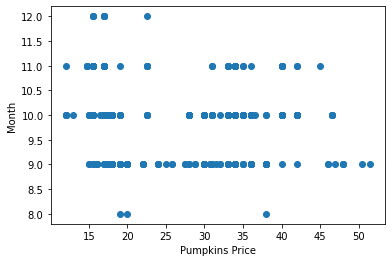

In [29]:
price  = new_pumpkins.Price
month = new_pumpkins.Month

plt.scatter(price, month)
plt.ylabel('Month')
plt.xlabel('Pumpkins Price')
plt.show()

Text(0, 0.5, 'Price of pumpkins')

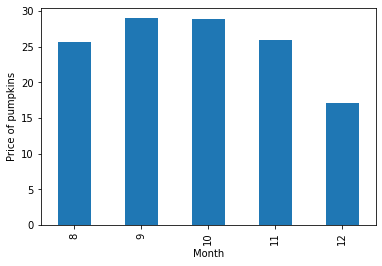

In [30]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind = 'bar')
plt.ylabel("Price of pumpkins")